In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
#exporting the data
calendar_df = pd.read_csv('./calendar.csv')
listings_df = pd.read_csv('./listings.csv')

In [3]:
#a new data frame is created to see how busy each listing
listing_availability = calendar_df.groupby('listing_id').count()
#a new columns is added: busy_days shows the total busy days of a listing
listing_availability['busy_days'] = listing_availability['available']-listing_availability['price']
#needless or repeated columns can be removed
listing_availability.drop(['date', 'available', 'price'], axis=1, inplace=True)
listing_availability.head()

,busy_days
listing_id,
3335,56
4291,0
5682,56
6606,0
7369,312


In [4]:
#property type column is added to our new dataframe
listing_availability = listing_availability.join(listings_df.set_index('id')['amenities']).reset_index()
listing_availability.head()

,listing_id,busy_days,amenities
0,3335,56,"{""Wireless Internet"",Kitchen,""Free Parking on ..."
1,4291,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F..."
2,5682,56,"{TV,Internet,""Wireless Internet"",Kitchen,Heati..."
3,6606,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
4,7369,312,"{TV,""Wireless Internet"",Kitchen,""Elevator in B..."


In [5]:
def total_count(df, col1, col2, look_for):
    '''
    THIS FUNCTION IS COPIED FROM THE UDACITY DATA SCIENCE COURSE
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    
    return new_df

In [6]:
# a list is generated for some important amenities
amenitites_list = ["Internet", "TV", "Kitchen", 'Pool', 'Essentials', 'Iron',
                  'Free Parking', 'Family/Kid Friendly', 'Heating', 'Breakfast', 'Washer', 'Hair Dryer',
                  'Smoke Detector', 'Shampoo', '24-Hour Check-in', 'Pets Allowed', 'Fire Extinguisher',
                  'Elevator', 'hot tub', 'Suitable for Events', 'Air Condition']

In [7]:
#function is called and new df is created
amenity_preference = total_count(listing_availability, 'amenities', 'busy_days', amenitites_list)
#rename the column
amenity_preference.columns.values[[1]] = ['preferred_times']
#sorting by preferred times and remove needless columns
amenity_preference.reset_index(inplace=True)
amenity_preference.sort_values(by='preferred_times', ascending=False, inplace=True)
amenity_preference.reset_index(inplace=True)
amenity_preference.drop(columns=['level_0', 'index'], inplace=True)
amenity_preference.head()

,amenities,preferred_times
0,Internet,445264
1,Heating,436643
2,Kitchen,419116
3,Smoke Detector,404428
4,Essentials,403645


In [8]:
#a new column is added to see what percentage of visitors get the services
amenity_preference['rate_of_preference'] = amenity_preference['preferred_times']/listing_availability['busy_days'].sum()
amenity_preference.head()

,amenities,preferred_times,rate_of_preference
0,Internet,445264,0.970015
1,Heating,436643,0.951234
2,Kitchen,419116,0.913051
3,Smoke Detector,404428,0.881053
4,Essentials,403645,0.879347


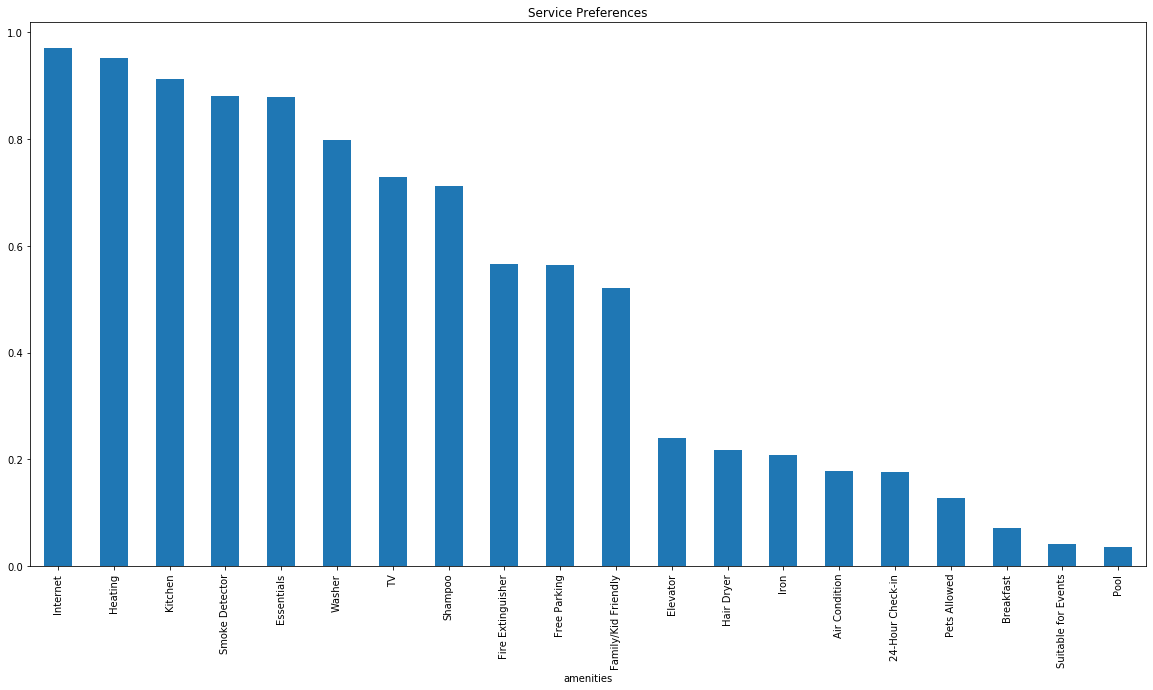

In [9]:
amenity_preference.set_index('amenities')['rate_of_preference'].plot(kind='bar')
plt.title("Service Preferences");
plt.gcf().set_size_inches(20, 10)

In [10]:
def row_count(df, col1, look_for):
    '''
    THIS FUNCTION IS COPIED FROM THE UDACITY DATA SCIENCE COURSE
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += 1
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    
    return new_df

In [11]:
services_df = row_count(listings_df, 'amenities', amenitites_list)
services_df.head()

,index,0
0,Internet,3692
1,TV,2741
2,Kitchen,3423
3,Pool,159
4,Essentials,3237


In [12]:
services_df.columns.values[1] = 'counted_lst'
services_df.set_index('index', inplace=True)
services_df['existence_rate'] = services_df['counted_lst'] / listings_df.shape[0]
services_df.head()

,counted_lst,existence_rate
index,,
Internet,3692,0.966998
TV,2741,0.717915
Kitchen,3423,0.896543
Pool,159,0.041645
Essentials,3237,0.847826


In [13]:
amenity_preference= amenity_preference.set_index('amenities').join(services_df['existence_rate']).reset_index()
amenity_preference.head()

,amenities,preferred_times,rate_of_preference,existence_rate
0,Internet,445264,0.970015,0.966998
1,Heating,436643,0.951234,0.949974
2,Kitchen,419116,0.913051,0.896543
3,Smoke Detector,404428,0.881053,0.859350
4,Essentials,403645,0.879347,0.847826


<Figure size 3000x9000 with 0 Axes>

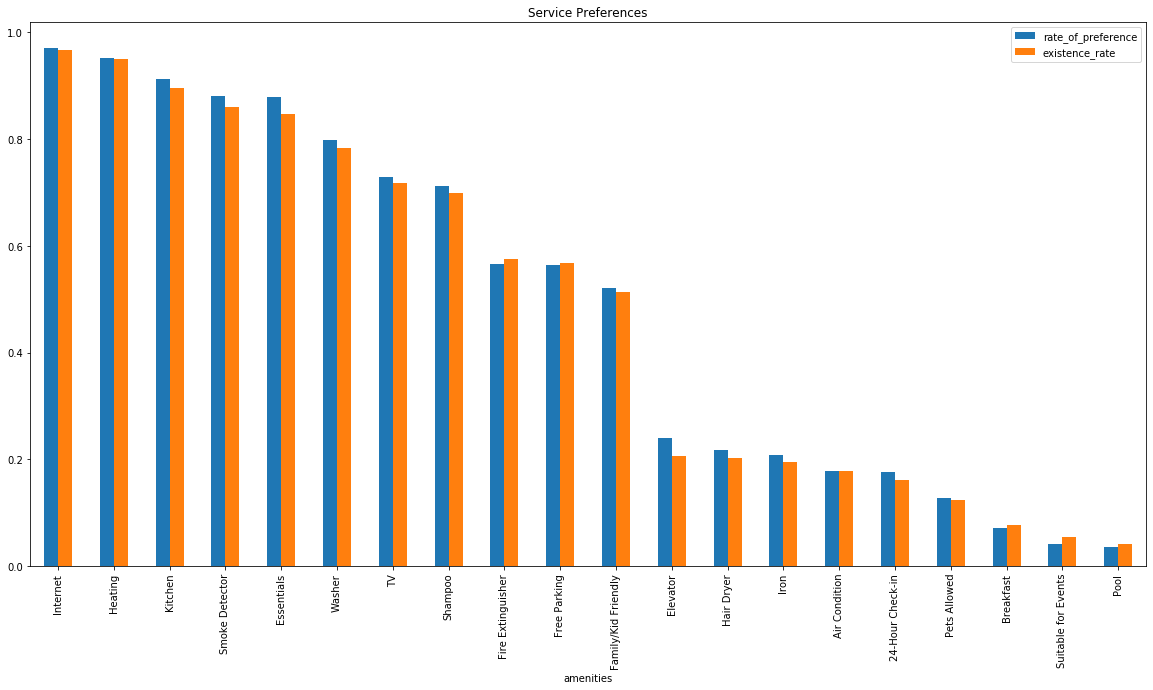

In [14]:
plt.figure(figsize=(10, 30), dpi=300, facecolor='w', edgecolor='k')
amenity_preference.set_index('amenities')[['rate_of_preference','existence_rate']].plot(kind='bar')
plt.title("Service Preferences");
plt.gcf().set_size_inches(20, 10)